In [1]:
# Download packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
# Fetch data
df = pd.read_csv(r'data/SAHeart.csv')
df = df.drop(columns=['row.names'])

N = df.shape[0]
M = df.shape[1]

print(f'N: {N}')
print(f'M: {M}')


N: 462
M: 10


In [3]:
df.head()


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
# Split into X and y
X = df.iloc[:,:-1]
y = df.loc[:,"chd"]

# Change to categorical
X['famhist'] = pd.Categorical(X['famhist']).codes
X.head()

print(f"{X.shape}, {y.shape}")

(462, 9), (462,)


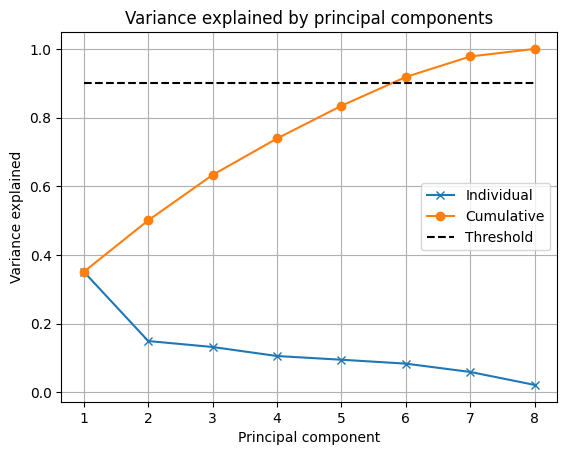

In [5]:
# Start by normalizing 
# Aftur nema normalized
X_no_binary = X.drop(columns="famhist", axis=1)
X_tilde = (X_no_binary - np.mean(X_no_binary, axis=0)) / np.std(X_no_binary, axis=0)

# Create a PCA object and fit to the data
pca = PCA()

pca.fit(X_tilde)
V = pca.components_.T
# Compute fraction of variance explained
rho = pca.explained_variance_ratio_

# 90% threshold for variance explained
threshold = 0.9
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()




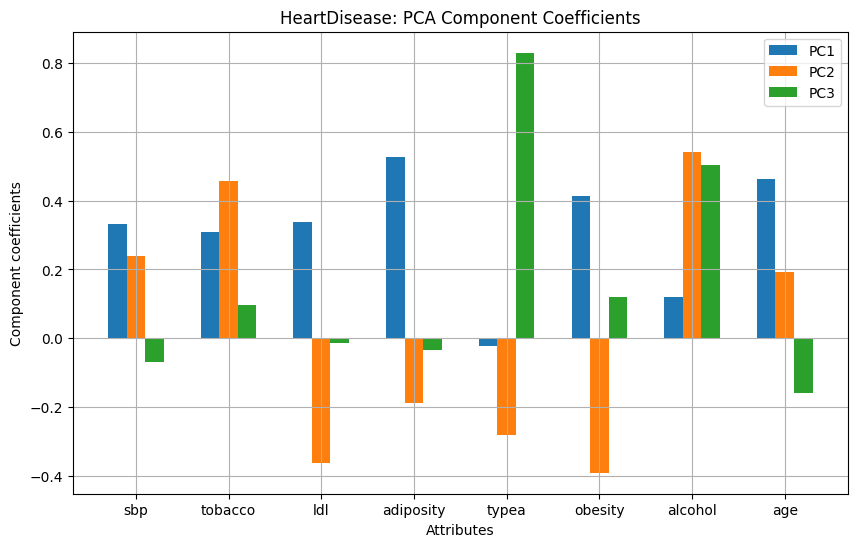

In [6]:
bw = 0.2
r = np.arange(1, X_tilde.shape[1] + 1)

fig = plt.figure(figsize=(10, 6))
plt.title("HeartDisease: PCA Component Coefficients")
for i, pc in enumerate(V[:, :3].T):
    plt.bar(r + i * bw, pc, width=bw, label=f"PC{i+1}")
plt.xticks(r + bw, X_tilde.columns)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()

Þetta sýnir að við þurfum 4 PC til að útskýra variance'inn

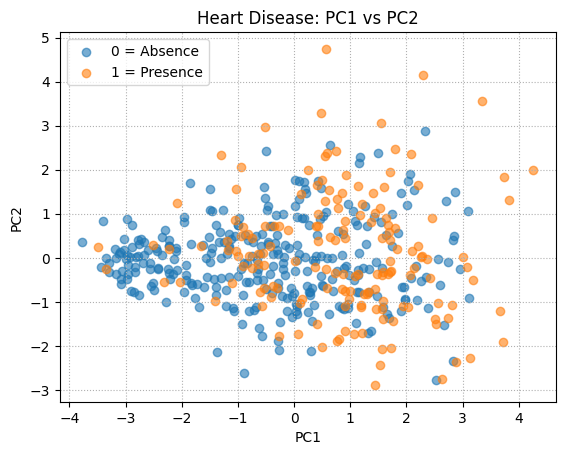

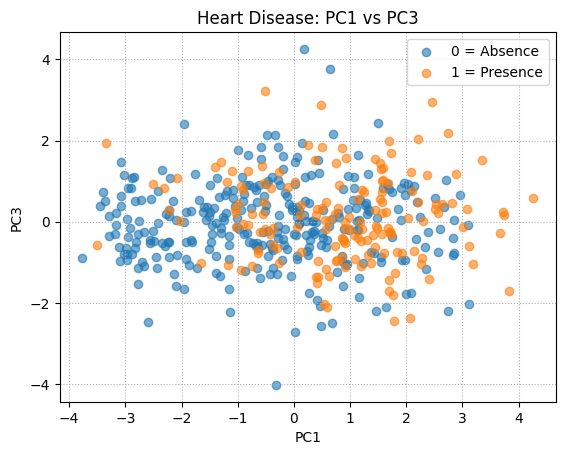

In [ ]:
# Project X to the PCA space
B = pca.transform(X_tilde)

unique_classes = np.unique(y)

# --- PC1 vs PC2 ---
PC_idxs = [0, 1]

fig = plt.figure()
plt.title("Heart Disease: PC1 vs PC2")

for is_chd in unique_classes:
    mask = (y == is_chd)
    plt.scatter(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], 
                alpha=0.6, label=f"{is_chd} = {'Absence' if is_chd == 0 else 'Presence'}")

plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()


# --- PC1 vs PC3 ---
PC_idxs = [0, 2]

fig = plt.figure()
plt.title("Heart Disease: PC1 vs PC3")

for is_chd in unique_classes:
    mask = (y == is_chd)
    plt.scatter(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], 
                alpha=0.6, label=f"{is_chd} = {'Absence' if is_chd == 0 else 'Presence'}")

plt.xlabel(f"PC{PC_idxs[0] + 1}")
plt.ylabel(f"PC{PC_idxs[1] + 1}")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()
